### This notebook was submitted by Julian Ferreiro (Net ID: jif245)

In [1]:
# The notebook should be named as ADS_HW5_<net_id>
# 10 pts will be deducted if the naming convention is not followed

In [2]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
#import Quandl
import statsmodels.formula.api as smf
from scipy import stats
from sklearn import linear_model
#from pandas.stats.api import ols

Populating the interactive namespace from numpy and matplotlib


# Task 1 (5 pts) 


a) Provide a definition for the concept of a conjugate prior given the Bayesian learning model

b) True or False:
Selecting a Gaussian prior for a likelihood function that is Gaussian, will ensure that the posterior distribution is also Gaussian

## Answer
a) When the posterior and prior distributions are of the same type, they are called "conjugate prior distributions", and the prior distribution is called conjugate prior. 

b) True. 

# Task 2 (5 pts). 


1) In the Bayesian linear regression framework (True or False)  
    a) Using a Laplacian prior will lead to the Ridge Regression  
    b) Using a Laplacian prior will lead to Lasso Regression

2) (True or False)  
    a) Ridge can often help with feature selection  
    b) Lasso can often help with feature selection

## Answer
1a) False  
1b) True  

2a) False  
2b) True  

# Task 3 (10 pts). 
Answer some questions about the properties of Lasso/Ridge:

1.a) Which regression adds penalty equivalent to square of the magnitude of coefficients?  
1.b) Which regression adds penalty  equivalent to absolute value of the magnitude of coefficients?

2) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

3) Which of the Lasso and Ridge regression is often use to completely eliminate coefficients for some of the regressors?

4) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

5) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?


## Answer
1.a) Ridge regression  
1.b) Lasso regression  
2) Ridge regression  
3) Lasso  
4) λ = 0  
5) Training


# Extra Credit(50 pts to be applied towards this or any other homework)
For a regression where the variables are highly correlated, which would you use, Lasso or Ridge and why?

It depends on the data and how high is the correlation. Although Lasso is good for feature selection, with highly correlated features it selects one of the highly correlated at random, and which feature it selects changes with the parameters. For this reason, Ridge is better in this cases, since it includes all of the features but distributes the coefficients between all the highly correlated ones according to how they correlate, solving the problem of multicollinearity. Nevertheless, when the multicollinearity is extreme and parameters provide almost the same information, in that case, Lasso could be more helpful eliminating unnecesary variables.
It al boils down to what is the goal. I would select ridge for a linear regression when looking for better predictability. 
If I want more interpretability, Lasso could be better. For example, if I analyze which variables are being eliminated, e.g. wanting to predict house price using house width, house lenght, and house area and two of them are eliminated by Lasso, this could be the better option, since I would want a variable that is using the house "size" for prediction. 


# Task 4 (15 pts). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=2$ and the prior $w\sim {\cal N}(4,2)$. Compute the posterior distribution after an observation $y=14,x=4$. After all, what is the probability of having $w<4$?

$$
\sim {\cal N}\left(\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)},
\frac{1}{\sqrt{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}\right)
$$

In [93]:
numer=(((2**(-2))*(14*4))+(2**(-2))*4)
denom=(4**2)*(2**(-2))+(2**(-2))
mean=numer/denom

desvio=((2**(-2))+(4**2)*(2**(-2)))**(-0.5)

print "The mean of the new distribution is",round(mean,2)
print "The variance of the new distribution is",round(desvio,2)

#To check the probability we import a package from scipy
from scipy.stats import norm
prob_higher_4=norm.cdf(4,mean,desvio)
print "The probability of having less than 4 is:",prob_higher_4

The mean of the new distribution is 3.53
The variance of the new distribution is 0.49
The probability of having less than 4 is: 0.834012266459


# Task 5 (20 pts)
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [4]:
## Learn to use numpy - Will be more useful in future
import pandas as pd
import numpy as np

data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
#Renaming the column names for better comprehension
col_name=data_train.columns[:-1]
col_name=[ "x" + s for s in col_name]
col_name.append("y")
data_train.columns=col_name

In [6]:
#changing name of test set for consistency
data_test.columns=col_name

In [7]:
lm = smf.ols(formula = 'y ~ x0+x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17\
                            +x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+\
                             x33+x34+x35+x36+x37+x38+x39 -1', data = data_train).fit()



In [8]:
y_err=data_test.y-lm.predict(data_test)
y_norm = data_test.y-np.mean(data_test.y)
OS_perf=1-y_err.dot(y_err)/y_norm.dot(y_norm) # R2 w.r.t. test set

In [9]:
print "In Sample performance",lm.rsquared
print "Out Sample performance",OS_perf

In Sample performance 1.0
Out Sample performance -1.02796436413


# Task 6 (20 pts)
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ and report their performance over the test set.

In [10]:
#For Lasso
print "For Lasso:"
Lasso=linear_model.Lasso(fit_intercept=False,alpha=30)
Lasso.fit(data_train.drop("y", axis=1),data_train.y)

# In the sample:
p_IS=Lasso.predict(data_train.drop("y", axis=1))
err_IS=p_IS-data_train.y
R_2_IS_Lasso=1-np.var(err_IS)/np.var(data_train.y)
print("The R-squared we found for IS Lasso is:{0}".format(R_2_IS_Lasso))

#Out of sample
p_OS=Lasso.predict(data_test.drop("y", axis=1))
err_OS=p_OS-data_test.y
R_2_OS_Lasso=1-np.var(err_OS)/np.var(data_test.y)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

For Lasso:
The R-squared we found for IS Lasso is:0.883355537217
The R-squared we found for OS Lasso is: 0.63746274109


C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [101]:
#For Ridge
Ridge = linear_model.Ridge(fit_intercept=False,alpha=3000)
print "For Ridge:"
Ridge.fit(data_train.drop("y", axis=1),data_train.y)

# In the sample:
p_IS=Ridge.predict(data_train.drop("y", axis=1))
err_IS=p_IS-data_train.y
R_2_IS_Ridge=1-np.var(err_IS)/np.var(data_train.y)

print("The R-squared we found for IS Ridge is:{0}".format(R_2_IS_Ridge))

#Out of sample
p_OS=Ridge.predict(data_test.drop("y", axis=1))
err_OS=p_OS-data_test.y
R_2_OS_Ridge=1-np.var(err_OS)/np.var(data_test.y)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

For Ridge:
The R-squared we found for IS Ridge is:0.91834582591
The R-squared we found for OS Ridge is: 0.522772634124


# Task 7 (25 pts)
a) For each $m=0,1,2,...39$ train OLS, Lasso and Ridge regressions(keep intercept) using the data from Task 5 above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ using the first $m$ columns of the data tables as the regressors  
i.e train the models by adding in a new variable each time. eg. Y~ x0, Y~x0+x1, Y~x0+x1+x2...Y~x0+x1+...+x39  

b) Plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.  
i.e (x-axis is number of regressors, y will be your R^2 for InSample & OutSample for each of the 3 models, all in one graph)


In [12]:
#Code obtained from Lab 9
# An anonymous function that returns your regression model for future usage
Regress = lambda feature: smf.ols(formula = 'y ~ %s'%feature, data = data_train).fit()

# For displaying R^2 and linear model summary
def modelEval(lm, key = 'y'):
    lmy = lm.predict(data_test)
    y_err = lmy - data_test[key]
    y_norm = data_test[key]-np.mean(data_test[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. test set

In [13]:
result = smf.ols(formula = 'y ~ '+ '+'.join(data_train.columns[:-1]), data = data_train).fit()
print('In sample R-squared: %f'%result.rsquared)
print('Out of sample R-squared: %f'%modelEval(result))

In sample R-squared: 1.000000
Out of sample R-squared: -1.028031


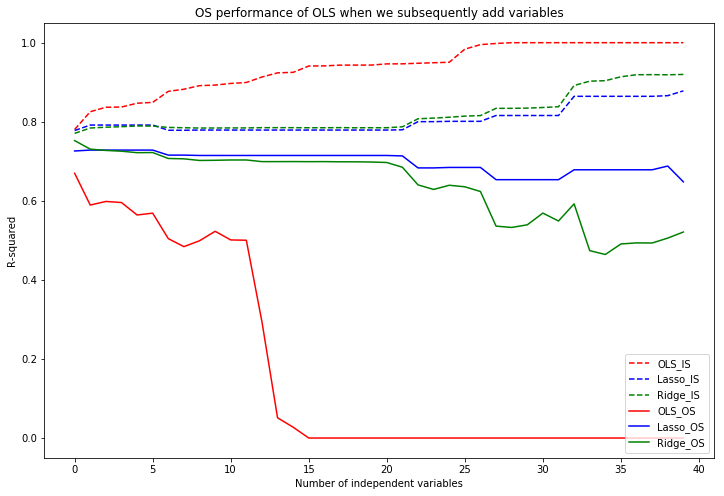

In [97]:
pylab.rcParams['figure.figsize'] = [12,8]

Number_variables=range(len(data_train.columns[:-1]))
#OLS
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]

#Ridge
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]

#Lasso
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

Ridge = linear_model.Ridge(fit_intercept=True,alpha=3000)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=30)



for i in Number_variables:
    #OLS
    lm = smf.ols(formula = 'y ~ '+ '+'.join(data_train.columns[:i+1]), data = data_train).fit()
    R2 = modelEval(lm)
    OLS_R_2_IS_F.append(lm.rsquared)
    OLS_R_2_OS_F.append(R2 if R2 > 0 else 0)
    
    #Ridge
    Ridge.fit(data_train.ix[:,:i+1],data_train.y)
    #In sample
    err_IS=Ridge.predict(data_train.ix[:,:i+1]) - data_train.y
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(data_train.y)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
    err_OS=Ridge.predict(data_test.ix[:,:i+1]) - data_test.y
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(data_test.y)
    OLS_R_2_Ridge_OS_F.append(max(R_2_OS_Ridge,0))
    
    #Lasso
    Lasso.fit(data_train.ix[:,:i+1],data_train.y)
    #In sample
    err_IS=Lasso.predict(data_train.ix[:,:i+1]) - data_train.y
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(data_train.y)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)
    
      #Out of sample
    err_OS=Lasso.predict(data_test.ix[:,:i+1]) - data_test.y
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(data_test.y)
    OLS_R_2_Lasso_OS_F.append(max(R_2_OS_Lasso,0))

    
#Plotting
plt.title('OS performance of OLS when we subsequently add variables')

plt.plot(Number_variables,OLS_R_2_IS_F,'r--',label='OLS_IS')
plt.plot(Number_variables,OLS_R_2_Lasso_IS_F,'b--',label='Lasso_IS')
plt.plot(Number_variables,OLS_R_2_Ridge_IS_F,'g--',label='Ridge_IS')
plt.plot(Number_variables,OLS_R_2_OS_F,'r',label='OLS_OS')
plt.plot(Number_variables,OLS_R_2_Lasso_OS_F,'b',label='Lasso_OS')
plt.plot(Number_variables,OLS_R_2_Ridge_OS_F,'g',label='Ridge_OS')

plt.legend(loc='lower right')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

# Extracredit (100 pts of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 70% training and 30% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression:   

a) For each $\lambda$ of an assumed sequence of $\lambda$'s(take a random range) compute validation R2 for all the 10 splits and finally select the $\lambda$ having the highest value for validation R2 for each split.  

b) Visualize the dependence of the validation R2 over $\lambda$s for Lasso and Ridge(x-axis = $\lambda$s from sequence, y-axis = corresponding R^2, graph for each split)

c) Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$ out of the 10 splits.

In [15]:
from sklearn.model_selection import train_test_split

In [109]:
pylab.rcParams['figure.figsize'] = [5,5]

In [200]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    
    
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,y_train, test_size = 0.3)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda,best_R2

In [193]:
values=pd.DataFrame(np.zeros((10,2)))
values.columns=["Lambda","r_2"]

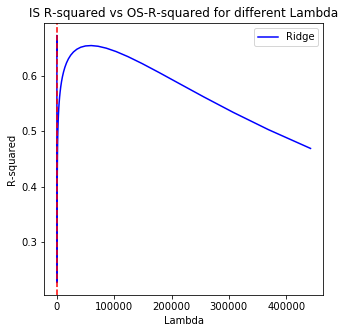

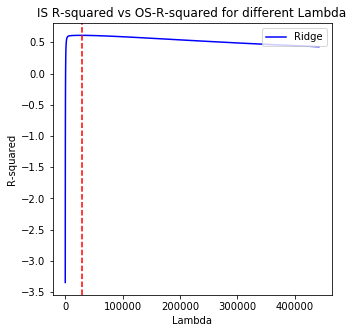

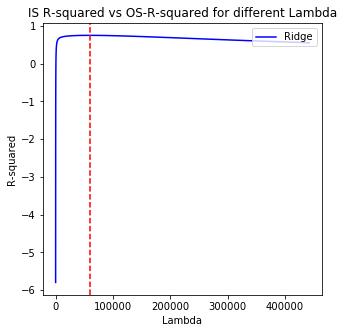

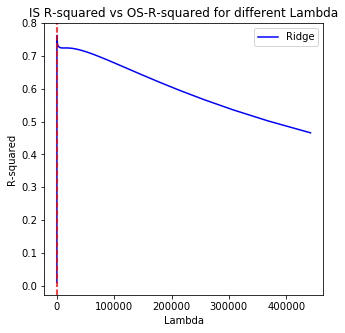

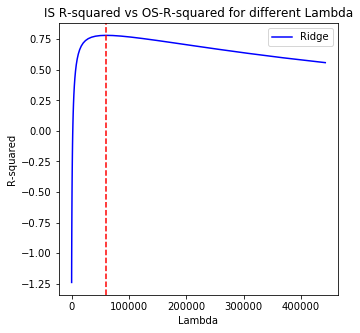

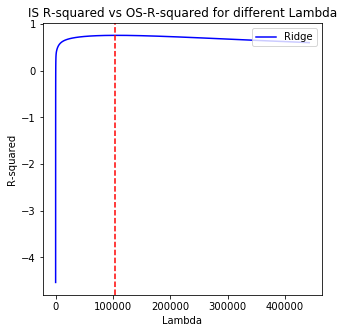

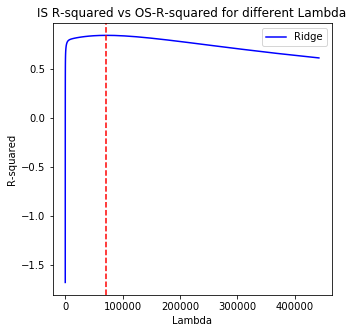

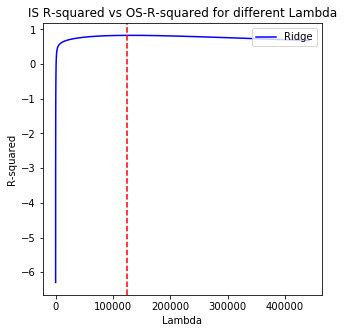

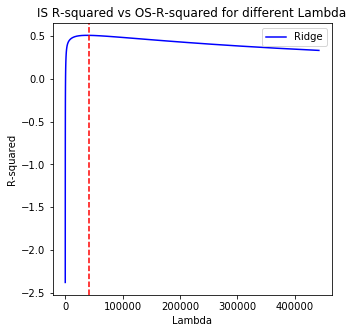

In [201]:
#plt.rcParams['figure.figsize'] = 5,5
best_lambda_s=[]
best_R2_s=[]

for i in range (1,10):
    lambdas = np.exp(np.linspace(-5,13,100))
    lambda_r_optimal=Regularization_fit_lambda(1,data_train.drop("y", axis=1),data_train.y,lambdas,Graph=True)
    #print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))
    values.iloc[i,:]=(lambda_r_optimal)
    

In [123]:
print "The lambdas and R2 are:"
values

The lambdas and R2 are:


,Lambda,r_2
0,0.000000,0.000000
1,59874.141715,0.567798
2,13981.000021,0.562704
3,16768.756927,0.734455
4,8103.083928,0.697261
5,6755.969870,0.743672
6,13981.000021,0.763554
7,9718.807277,0.730000
8,41621.146081,0.725971
9,16768.756927,0.701831


In [195]:
print "For Ridge:"
values[values["r_2"]==max(values.iloc[:,1])]

For Ridge:


,Lambda,r_2
6,11656.699565,0.948579


In [196]:
#For Ridge
Ridge = linear_model.Ridge(fit_intercept=False,alpha=values[values["r_2"]==max(values.iloc[:,1])].iloc[0,0])
print "For Ridge:"
Ridge.fit(data_train.drop("y", axis=1),data_train.y)

#Out of sample
p_OS=Ridge.predict(data_test.drop("y", axis=1))
err_OS=p_OS-data_test.y
R_2_OS_Ridge=1-np.var(err_OS)/np.var(data_test.y)
print("The R-squared we found for OS Ridge with the optimal Lambda is: {0}".format(R_2_OS_Ridge))

For Ridge:
The R-squared we found for OS Ridge with the optimal Lambda is: 0.626127233904


### Now we do the same for Lasso

In [159]:
values_lasso=pd.DataFrame(np.zeros((10,2)))
values_lasso.columns=["Lambda","r_2"]

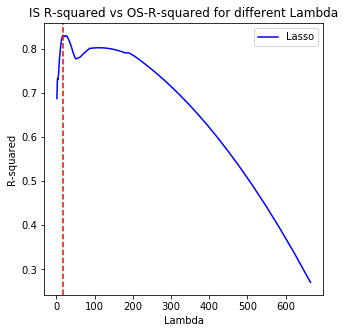

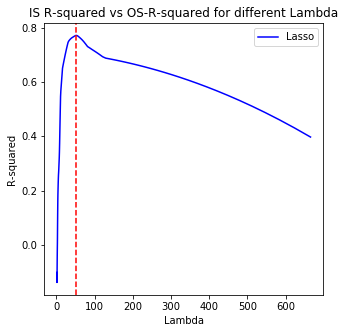

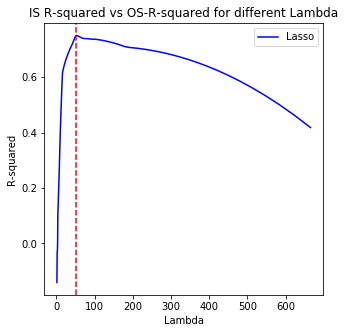

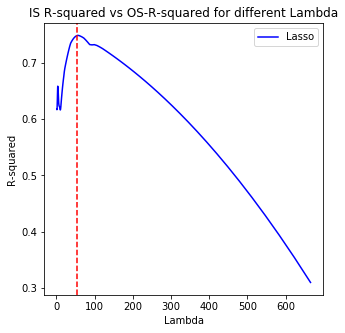

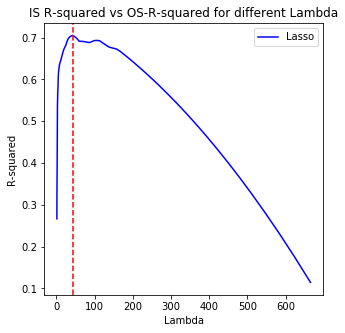

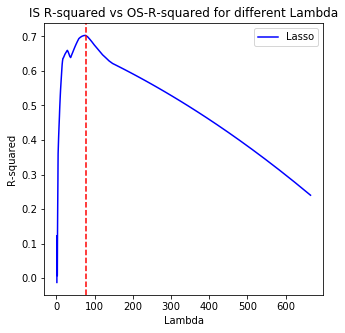

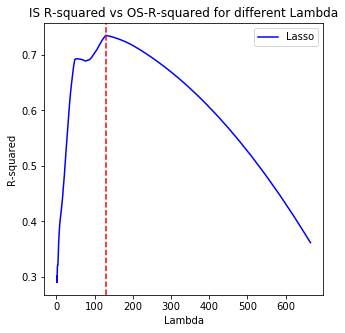

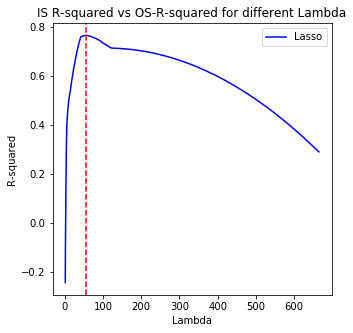

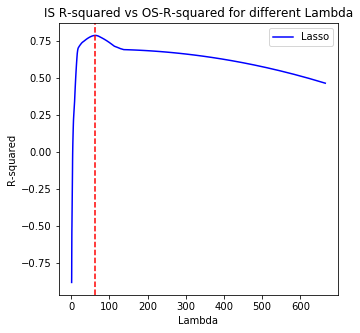

In [202]:
#plt.rcParams['figure.figsize'] = 5,5
best_lambda_s=[]
best_R2_s=[]

for i in range (1,10):
    lambdas = np.exp(np.linspace(0,6.5,100))
    lambda_l_optimal=Regularization_fit_lambda(2,data_train.drop("y", axis=1),data_train.y,lambdas,Graph=True)
    #print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))
    values_lasso.iloc[i,:]=(lambda_l_optimal)
    

In [203]:
print "The lambdas and R2 for Lasso are:"
values_lasso

The lambdas and R2 for Lasso are:


,Lambda,r_2
0,0.000000,0.000000
1,16.831167,0.829776
2,51.387448,0.771193
3,51.387448,0.750597
4,54.874596,0.748332
5,42.200170,0.705509
6,76.197857,0.702952
7,128.841873,0.735149
8,54.874596,0.766991
9,62.574862,0.788597


In [205]:
print "For Lasso the lambda with highest R2:"
values_lasso[values_lasso["r_2"]==max(values_lasso.iloc[:,1])]

For Lasso the lambda with highest R2:


,Lambda,r_2
1,16.831167,0.829776


In [207]:
#For Lasso
print "For Lasso:"
Lasso=linear_model.Lasso(fit_intercept=False,alpha=values_lasso[values_lasso["r_2"]==max(values_lasso.iloc[:,1])].iloc[0,0])
Lasso.fit(data_train.drop("y", axis=1),data_train.y)


#Out of sample
p_OS=Lasso.predict(data_test.drop("y", axis=1))
err_OS=p_OS-data_test.y
R_2_OS_Lasso=1-np.var(err_OS)/np.var(data_test.y)
print("The R-squared we found for OS Lasso for the highest lambda is: {0}".format(R_2_OS_Lasso))

For Lasso:
The R-squared we found for OS Lasso for the highest lambda is: 0.604185539944
